<a href="https://colab.research.google.com/github/Ranjan4Kumar/Amazon-Food-Review/blob/main/different_machine_learning_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Donload data set from -> https://drive.google.com/file/d/1VjEjCwoAqEnMSFALlNRNS3e-5zcp3UEQ/view?usp=share_link
'''
Everyday we come across various products in our lives, on the digital medium we swipe across hundreds of 
product choices under one category. It will be tedious for the customer to make selection. Here comes 
'reviews' where customers who have already got that product leave a rating after using them and brief their 
experience by giving reviews. As we know ratings can be easily sorted and judged whether a product is good or bad. 
But when it comes to sentence reviews we need to read through every line to make sure the review conveys a positive or
negative sense. In the era of artificial intelligence, things like that have got easy with the 
Natural Langauge Processing(NLP) technology.


Objective:
Given a review, determine whether the review is positive (Rating of 4 or 5) or negative (rating of 1 or 2).


[Q] How to determine if a review is positive or negative?

[Ans] We could use the Score/Rating. A rating of 4 or 5 could be cosnidered a positive review. A review of 1 or 2 could be considered negative. A review of 3 is nuetral and ignored. 
This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.
'''

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data1 = pd.read_csv('/content/drive/MyDrive/DS/Amazon Food Review/Reviews.csv')
data1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
data1.shape

(568454, 10)

In [17]:
data = data1.head(10000)

In [18]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      10000 non-null  int64 
 1   ProductId               10000 non-null  object
 2   UserId                  10000 non-null  object
 3   ProfileName             10000 non-null  object
 4   HelpfulnessNumerator    10000 non-null  int64 
 5   HelpfulnessDenominator  10000 non-null  int64 
 6   Score                   10000 non-null  int64 
 7   Time                    10000 non-null  int64 
 8   Summary                 10000 non-null  object
 9   Text                    10000 non-null  object
dtypes: int64(5), object(5)
memory usage: 781.4+ KB


In [20]:
data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [22]:
data.dropna(inplace = True , axis = 0)
data.shape

(10000, 10)

In [23]:
data.Score.unique()

array([5, 1, 4, 2, 3])

In [24]:
def number_to_feedback(x):
    if(x < 3):
        return 0
#     elif(x == 3):
#         return 'Neutral'
    else:
        return 1

In [25]:
# Converting our feedback data into categorical data in the form of [0,1] array which will helpful for us
data['feedback'] = data['Score'].apply(number_to_feedback)
data.feedback.unique()

<ipython-input-25-92a07ccb68c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['feedback'] = data['Score'].apply(number_to_feedback)


array([1, 0])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


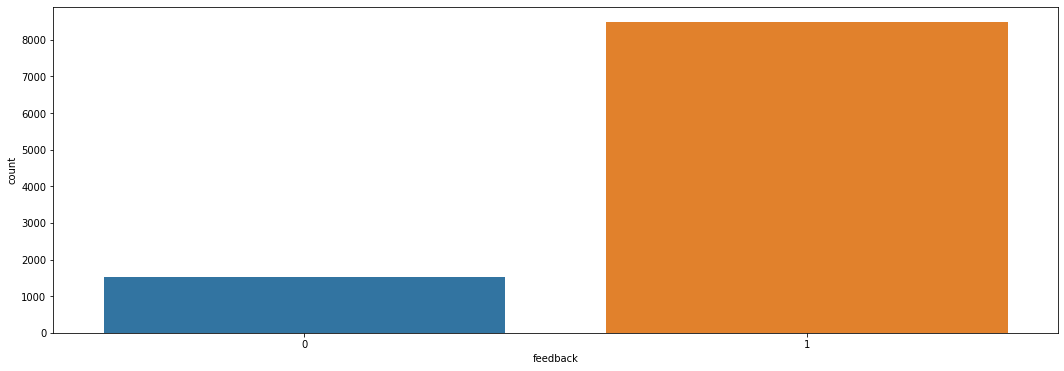

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize = (18,6))
import seaborn as sns
sns.countplot(data.feedback)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


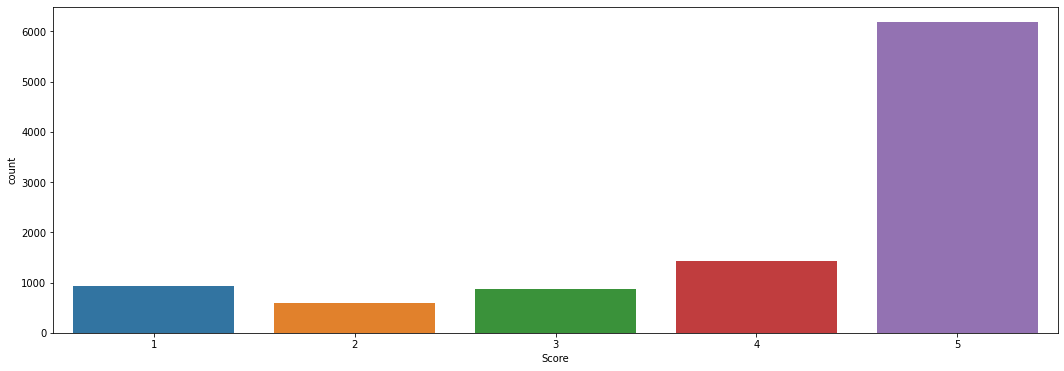

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize = (18,6))
import seaborn as sns
sns.countplot(data['Score'])
plt.show()

In [28]:
data.drop_duplicates(subset = {"UserId","ProfileName","Time","Text"} , inplace = True)
data.shape

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(9515, 11)

In [29]:
final_data = data[data['HelpfulnessNumerator'] <= data['HelpfulnessDenominator']]
final_data.shape

(9515, 11)

In [30]:
final_X = final_data.loc[: , ['Text']]
final_y = final_data.loc[: , 'feedback']

In [ ]:
'''
3]. Text Preprocessing.
Now that we have finished deduplication our data requires some preprocessing 
before we go on further with analysis and making the prediction model.

Hence in the Preprocessing phase we do in the following order

Begin by removing the html tags
Remove any punctuations or limited set of special characters like , or . or # etc.
Check if the word is made up of english letters and is not alpha-numeric
Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
Convert the word to lowercase
Remove Stopwords
Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)
After which we collect the words used to describe positive and negative reviews
'''

In [37]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [38]:
from nltk import stem
import re
snow = stem.SnowballStemmer('english')
'''
Snowball Stemmer

The following languages are supported:
Arabic, Danish, Dutch, English, Finnish, French, German,
Hungarian, Italian, Norwegian, Portuguese, Romanian, Russian,
Spanish and Swedish.

The algorithm for English is documented here:

    Porter, M. "An algorithm for suffix stripping."
    Program 14.3 (1980): 130-137.

The algorithms have been developed by Martin Porter.
These stemmers are called Snowball, because Porter created
a programming language with this name for creating
new stemming algorithms. There is more information available
at http://snowball.tartarus.org/

The stemmer is invoked as shown below:
'''
def text_cleaning(sentence):
    sentence = sentence.lower()
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence) #removed html tag
    words = [snow.stem(word) for word in sentence.split() if word not in stop]
    return ' '.join(words)

In [39]:
final_X['cleaned_text'] = final_X['Text'].apply(text_cleaning)
final_X.head()

,Text,cleaned_text
0,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...
1,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanuts...th pe...
2,This is a confection that has been around a fe...,"confect around centuries. light, pillowi citru..."
3,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found it...
4,Great taffy at a great price. There was a wid...,great taffi great price. wide assort yummi taf...


In [40]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 5000)
tf_data = tfidf.fit_transform(final_X['cleaned_text'])

CPU times: user 448 ms, sys: 1.74 ms, total: 449 ms
Wall time: 487 ms


In [41]:
tf_data[1]

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [42]:
from sklearn.model_selection import train_test_split
X_train  , X_test , y_train , y_test = train_test_split(tf_data , final_y , test_size = 0.2 , stratify = final_y)


In [43]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [44]:
model1.fit(X_train , y_train)

LogisticRegression()

In [45]:
pred = model1.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , pred)

0.8717813977929585

In [47]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(X_train , y_train)
pred = model2.predict(X_test)
accuracy_score(y_test , pred)

0.8738833420914346

In [49]:
# from sklearn.naive_bayes import GaussianNB
# model = GaussianNB()
# model.fit(X_train , y_train)
# pred = model.predict(X_test)
# accuracy_score(y_test , pred)

# for Gaussian we have to pass dense architecture

TypeError: ignored

In [50]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(X_train , y_train)
pred = model3.predict(X_test)
accuracy_score(y_test , pred)

0.8271150814503415

In [51]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model4.fit(X_train , y_train)
pred = model4.predict(X_test)
accuracy_score(y_test , pred)

0.8660010509721492

In [52]:
import xgboost as xgb
model5 = xgb.XGBClassifier()
model5.fit(X_train , y_train)
pred = model5.predict(X_test)
accuracy_score(y_test , pred)

0.8649500788229112

In [54]:
#creating the objects
from sklearn.model_selection import cross_val_score
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
svc_cv=SVC()
xgb_cv = xgb.XGBClassifier()
random_f_c = RandomForestClassifier()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'SVC',3:'XGB',4:'RFC'}
cv_models=[logreg_cv,dt_cv,svc_cv,xgb_cv,random_f_c]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, tf_data, final_y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8750402053565907
Decision Tree Test Accuracy: 0.819756514593219
SVC Test Accuracy: 0.8738839699917822
XGB Test Accuracy: 0.8653707066422784
RFC Test Accuracy: 0.8653704857337257
